In [1]:
library(ggplot2)
library(reshape2)
library(plyr)


In [15]:
df = read.table("../../../hormone_profiling/BR_profiling_BestLab_20230914.txt", sep = '\t', header = TRUE)
df$cat <- paste(df$accn, df$sex, sep=" ")
df = subset(df, accn != 'her13')

df_meds <- ddply(df, .(cat,id,sex), summarise, med = round(median(abundance)))

In [16]:
head(df_meds)

cat,id,sex,med
<chr>,<chr>,<chr>,<dbl>
her19 herm,24-methylene cholesterol,herm,27
her19 herm,6-oxocampestanol,herm,138
her19 herm,beta-sitosterol,herm,3162
her19 herm,campestanol,herm,33
her19 herm,campesterol,herm,743
her19 herm,isofucosterol,herm,104


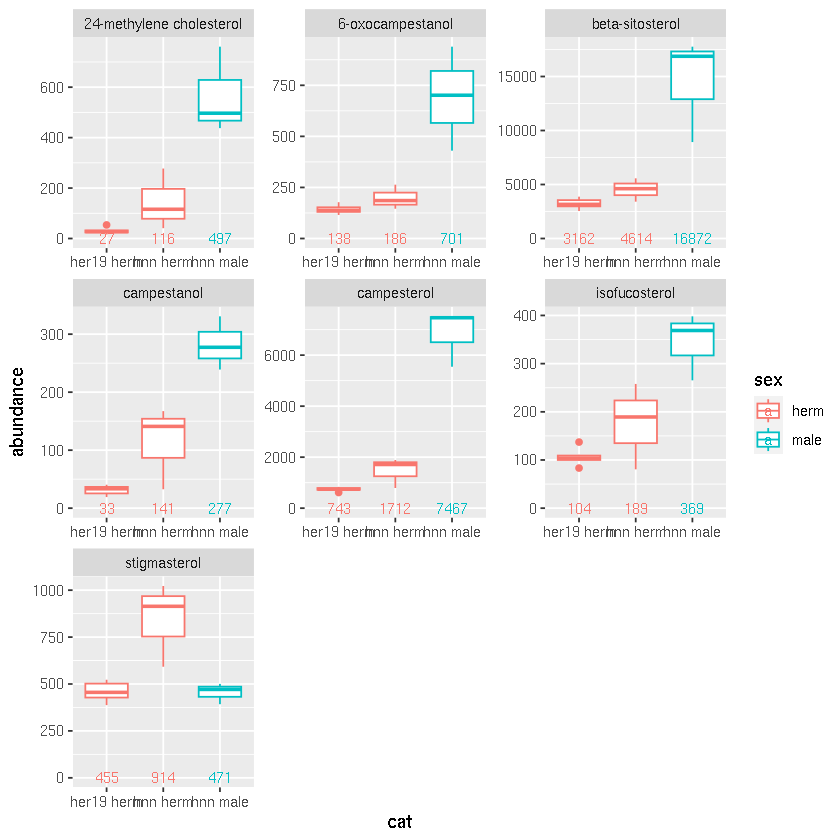

In [21]:
gg = ggplot(df, aes(x=cat, y=abundance, color=sex))
gg = gg + geom_boxplot()
# gg = gg + scale_color_manual(values = c("#000000", rep_len(c("#BBBBBB", "#000000"), length(unique(df$chromosome))-1)))
# gg = gg + theme_classic()
# gg = gg + theme(legend.position = "none")
gg = gg + facet_wrap(~id, scales = "free")
gg = gg + geom_text(data = df_meds, aes(x = cat, y = 0, label = med), size = 3)
gg

ggsave('br_profiles.pdf', device = "pdf", width = 7.5, height = 8, units = "in")

In [22]:
df = read.table("../../../hormone_profiling/Hormone_profiling_BestLab.txt", sep = '\t', header = TRUE)
df$cat <- paste(df$accn, df$sex, sep=" ")
df = subset(df, accn != 'her13')

df_meds <- ddply(df, .(cat,id,sex), summarise, med = round(median(abundance)))

In [23]:
head(df)

,accn,media,sex,sample,rt,abundance,id,cat
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,her19,FM,herm,F7,4.149667,16752.619,12OHJA,her19 herm
2,her19,FM,herm,F11,4.149667,1152.325,12OHJA,her19 herm
3,her19,FM,herm,F12,4.149667,5662.857,12OHJA,her19 herm
10,hnn,CFM,male,F28,4.149667,225541.646,12OHJA,hnn male
11,hnn,CFM,male,F29,4.149667,69946.895,12OHJA,hnn male
12,hnn,CFM,male,F30,4.149667,128809.772,12OHJA,hnn male


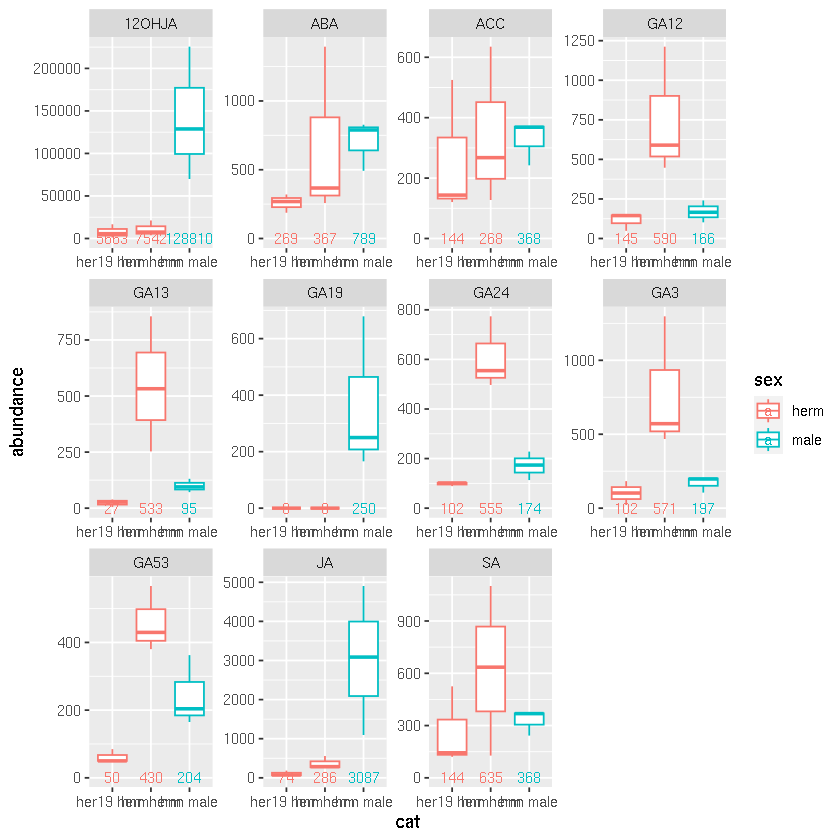

In [24]:
gg = ggplot(df, aes(x=cat, y=abundance, color=sex))
gg = gg + geom_boxplot()
# gg = gg + scale_color_manual(values = c("#000000", rep_len(c("#BBBBBB", "#000000"), length(unique(df$chromosome))-1)))
# gg = gg + theme_classic()
# gg = gg + theme(legend.position = "none")
gg = gg + facet_wrap(~id, scales = "free")
gg = gg + geom_text(data = df_meds, aes(x = cat, y = 0, label = med), size = 3)

gg

ggsave('hormone_profiles.pdf', device = "pdf", width = 7.5, height = 8, units = "in")